In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

## Load CIFAR-10 dataset

In [2]:
(x_train, y_train), (x_test, y_test) = datasets.cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 6s 0us/step


## Defining DNN model

In [3]:
model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=x_train.shape[1:]),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [5]:
# compiling
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

## Training the model

In [6]:
history = model.fit(x_train, y_train, epochs=10,
                    validation_data=(x_test, y_test),
                    batch_size=64)


Epoch 1/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 72s 88ms/step - accuracy: 0.3085 - loss: 2.9370 - val_accuracy: 0.4951 - val_loss: 1.3985
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 82s 88ms/step - accuracy: 0.5245 - loss: 1.3232 - val_accuracy: 0.5670 - val_loss: 1.2301
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 79s 84ms/step - accuracy: 0.5916 - loss: 1.1429 - val_accuracy: 0.5819 - val_loss: 1.1877
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 82s 84ms/step - accuracy: 0.6229 - loss: 1.0541 - val_accuracy: 0.5996 - val_loss: 1.1710
Epoch 5/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 70s 89ms/step - accuracy: 0.6624 - loss: 0.9635 - val_accuracy: 0.6170 - val_loss: 1.1003
Epoch 6/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 79s 85ms/step - accuracy: 0.6816 - loss: 0.9016 - val_accuracy: 0.6456 - val_loss: 1.0343
Epoch 7/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 82s 84ms/step - accuracy: 0.7100 - loss: 0.8284 - val_accuracy: 0.6504 - val_loss: 1.0620
Epoch 8/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 81s 84ms/step - accuracy: 0.7272 - loss: 0.7711 - 

## Evaluating on test set

In [7]:
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print("Test accuracy:", test_acc)

313/313 - 4s - 12ms/step - accuracy: 0.6548 - loss: 1.0686
Test accuracy: 0.6547999978065491


In [8]:
y_pred = np.argmax(model.predict(x_test), axis=1)
y_true = y_test.flatten()
print(classification_report(y_true, y_pred))

313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step
              precision    recall  f1-score   support

           0       0.69      0.65      0.67      1000
           1       0.80      0.81      0.81      1000
           2       0.54      0.58      0.56      1000
           3       0.44      0.52      0.48      1000
           4       0.55      0.61      0.58      1000
           5       0.60      0.45      0.52      1000
           6       0.78      0.69      0.73      1000
           7       0.74      0.70      0.72      1000
           8       0.71      0.79      0.75      1000
           9       0.75      0.76      0.76      1000

    accuracy                           0.65     10000
   macro avg       0.66      0.65      0.66     10000
weighted avg       0.66      0.65      0.66     10000



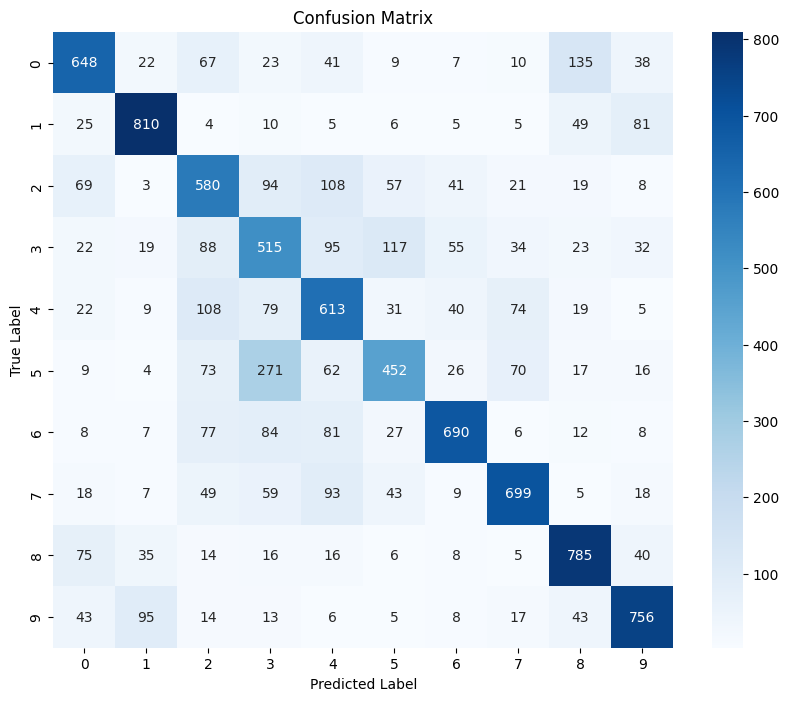

In [9]:
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(10,8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

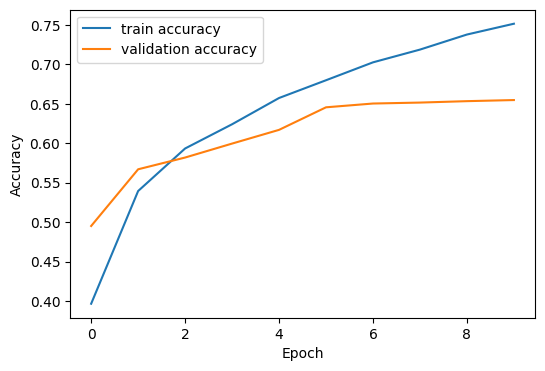

In [10]:
plt.figure(figsize=(6,4))
plt.plot(history.history['accuracy'], label='train accuracy')
plt.plot(history.history['val_accuracy'], label='validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()